In [1]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U spacy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [4]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import os
import sys
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [26]:
# regular expressions for removing special characters, such as punctuation
import re
# gensim is a library for text processing including n-gram models
import gensim
from gensim.utils import simple_preprocess
# spacy is also for text processing, here we are using the lemmatiser
import spacy
# This package draws word clouds, as a form of frequency analysis
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [7]:
imdb_df = pd.read_csv("C:\/Users\/798080\/OneDrive - hull.ac.uk\/Downloads\/IMDB Dataset.csv")

In [8]:
imdb_df

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [9]:
imdb_df['review'] = imdb_df['review'].apply(str).map(lambda x: re.sub('[,\.!?]',
'', x))
# Convert the titles to lowercase
imdb_df['review'] = imdb_df['review'].apply(str).map(lambda x: x.lower())
# Print out the first rows of reviews


In [10]:
imdb_df['review'].apply(str)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production <br /><br />the ...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [11]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))
#deacc=True removes punctuations
data = imdb_df['review'].tolist()
# data = imdb_df['review'][0:500].tolist()
# data = imdb_df['review'].tolist()
data_words = list(sent_to_words(data))
print('data_words[:1]', data_words[:1])

data_words[:1] [['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', 'oz', 'episode', 'you', 'll', 'be', 'hooked', 'they', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'br', 'br', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', 'trust', 'me', 'this', 'is', 'not', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'word', 'br', 'br', 'it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'it', 'focuses', 'mainly', 'on', 'emerald', 'city', 'an', 'experimental', 'section', 'of', 'the', 'prison',

In [12]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
# higher threshold fewer phrases.
print('bigram',bigram)
print('bigram data',bigram[data_words])
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
print('trigram',trigram)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
bigram_mod.save("bigram_mod")
trigram_mod.save("trigram_mod")
bigram_mod = gensim.models.Phrases.load("bigram_mod")
trigram_mod = gensim.models.Phrases.load("trigram_mod")

bigram Phrases<2481247 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
bigram data <gensim.interfaces.TransformedCorpus object at 0x00000166E1D17610>
trigram Phrases<2563826 vocab, min_count=5, threshold=100, max_vocab_size=40000000>


In [13]:
for bigram in bigram_mod.phrasegrams.keys():
    print(bigram)

faint_hearted
maximum_security
graphic_violence
middle_class
darker_side
air_conditioned
light_hearted
serial_killer
woody_allen
wears_prada
soap_opera
visually_stunning
new_york
steve_buscemi
rosario_dawson
carol_kane
michael_imperioli
paul_lukas
bette_davis
mildly_entertaining
looking_forward
harvey_keitel
gut_wrenching
low_budget
year_old
unintentional_humor
janet_leigh
tropical_island
til_schweiger
udo_kier
mad_scientist
palm_trees
worth_mentioning
victorian_era
george_clooney
high_school
rosanna_arquette
liam_neeson
owen_wilson
shirley_jackson
special_effects
emotional_attachment
star_wars
elijah_wood
golden_globe
facial_expressions
michael_rooker
cringe_worthy
paper_thin
geared_towards
fail_miserably
won_regret
speed_racer
english_dub
unintentionally_hilarious
karen_carpenter
cynthia_gibb
human_beings
tarsem_singh
serial_killers
subject_matter
jennifer_lopez
eye_popping
political_satire
failed_miserably
poking_fun
large_scale
silver_screen
civil_war
cold_mountain
jude_law
nicole_

In [14]:
for trigram in trigram_mod.phrasegrams.keys():
    print(trigram)

faint_hearted
maximum_security
graphic_violence
middle_class
darker_side
michael_sheen
air_conditioned
light_hearted
serial_killer
woody_allen
wears_prada
devil_wears_prada
soap_opera
visually_stunning
new_york
steve_buscemi
rosario_dawson
carol_kane
michael_imperioli
paul_lukas
bette_davis
mildly_entertaining
looking_forward
harvey_keitel
gut_wrenching
low_budget
year_old
unintentional_humor
janet_leigh
tropical_island
til_schweiger
udo_kier
mad_scientist
palm_trees
worth_mentioning
victorian_era
george_clooney
high_school
rosanna_arquette
liam_neeson
owen_wilson
shirley_jackson
special_effects
character_development
emotional_attachment
star_wars
elijah_wood
golden_globe
facial_expressions
michael_rooker
cringe_worthy
paper_thin
geared_towards
fail_miserably
won_regret
speed_racer
english_dub
unintentionally_hilarious
karen_carpenter
cynthia_gibb
human_beings
tarsem_singh
serial_killers
subject_matter
jennifer_lopez
set_design
eye_popping
political_satire
failed_miserably
war_inc
poki

In [15]:
from gensim.parsing.preprocessing import STOPWORDS
my_stop_words = STOPWORDS.union(set(['br']))
# Define functions for stopwords, bigrams, trigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in my_stop_words] for doc in texts]

In [16]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [17]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
data_words_nostops

[['reviewers',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'll',
  'hooked',
  'right',
  'exactly',
  'happened',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scenes',
  'violence',
  'set',
  'right',
  'word',
  'trust',
  'faint',
  'hearted',
  'timid',
  'pulls',
  'punches',
  'regards',
  'drugs',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'word',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focuses',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cells',
  'glass',
  'fronts',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'manyaryans',
  'muslims',
  'gangstas',
  'latinos',
  'christians',
  'italians',
  'irish',
  'moreso',
  'scuffles',
  'death',
  'stares',
  'dodgy',
  'dealings',
  'shady',
  'agreements',
  'far',
  'away',
  'main',
  'appeal',
  'fact',
  'goes',
  'shows',
  

In [18]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
data_words_bigrams

[['reviewers',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'll',
  'hooked',
  'right',
  'exactly',
  'happened',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scenes',
  'violence',
  'set',
  'right',
  'word',
  'trust',
  'faint_hearted',
  'timid',
  'pulls',
  'punches',
  'regards',
  'drugs',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'word',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum_security',
  'state',
  'penitentary',
  'focuses',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cells',
  'glass',
  'fronts',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'manyaryans',
  'muslims',
  'gangstas',
  'latinos',
  'christians',
  'italians',
  'irish',
  'moreso',
  'scuffles',
  'death',
  'stares',
  'dodgy',
  'dealings',
  'shady',
  'agreements',
  'far',
  'away',
  'main',
  'appeal',
  'fact',
  'goes',
  'shows',
  'wouldn',


In [19]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [20]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print('data_lemmatized[:1]', data_lemmatized[:1])

data_lemmatized[:1] [['reviewer', 'mention', 'watch', 'episode', 'hook', 'right', 'exactly', 'happen', 'thing', 'strike', 'brutality', 'unflinche', 'scene', 'violence', 'set', 'right', 'word', 'trust', 'faint_hearte', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'call', 'nickname', 'give', 'oswald', 'maximum_security', 'state', 'penitentary', 'focus', 'mainly', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privacy', 'high', 'agenda', 'home', 'muslim', 'italian', 'irish', 'moreso', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'far', 'away', 'main', 'appeal', 'fact', 'go', 'show', 'forget', 'pretty', 'picture', 'paint', 'mainstream', 'audience', 'forget', 'charm', 'romanceoz', 'mess', 'episode', 'see', 'strike', 'nasty', 'surreal', 'ready', 'watch', 'develop', 'taste', 'get', 'accustom', 'high', 'level', 'graphic_violence', 'violence', 'injustice', 'crook', 'guard', 'sell', 'nickel', 'in

In [21]:
def getWordCloud(hashtags):
    # Read the whole text.
    text = ' '.join(hashtags)
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)
    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig('wordcloud_all.pdf', dpi=500)
    plt.show()

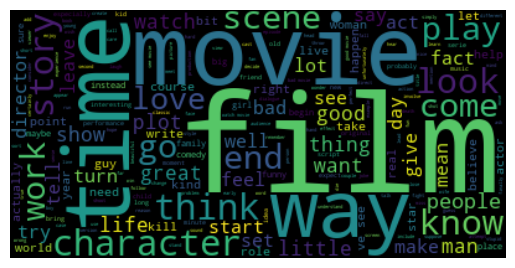

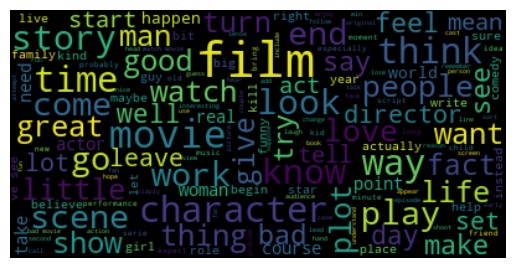

In [22]:
s = []
for l in data_lemmatized:
    t = ' '.join(l)
    s.append(t)
getWordCloud(s)

In [23]:
# Assuming you already have data_lemmatized and sentiment labels available

# Convert data_lemmatized into text
text_data = s
text_data

['reviewer mention watch episode hook right exactly happen thing strike brutality unflinche scene violence set right word trust faint_hearte timid pull punch regard drug sex violence hardcore classic use word call nickname give oswald maximum_security state penitentary focus mainly section prison cell glass front face inward privacy high agenda home muslim italian irish moreso scuffle death stare dodgy dealing shady agreement far away main appeal fact go show forget pretty picture paint mainstream audience forget charm romanceoz mess episode see strike nasty surreal ready watch develop taste get accustom high level graphic_violence violence injustice crook guard sell nickel inmate kill order away mannere middle_class inmate turn prison bitch lack street skill prison experience watch comfortable uncomfortable viewingthat touch darker',
 'wonderful little production filming technique unassume old time fashion give comfort discomforting sense realism entire piece actor extremely choose ge

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_data, imdb_df['sentiment'], test_size=0.33, random_state=42)

In [25]:
# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train the classifier
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Predict sentiment labels for the test set
y_pred = clf.predict(X_test_counts)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8559393939393939


In [32]:
# Assuming you have the IMDb dataset loaded as imdb_df

# Split the dataset into positive and negative reviews
positive_reviews = imdb_df[imdb_df['sentiment'] == 'positive']
negative_reviews = imdb_df[imdb_df['sentiment'] == 'negative']

# Combine all positive reviews into a single string
positive_text = ' '.join(positive_reviews['review'])

# Combine all negative reviews into a single string
negative_text = ' '.join(negative_reviews['review'])

# Now you can perform further analysis on positive_text and negative_text
# For example, you can use CountVectorizer or TF-IDFVectorizer to extract features

# Here's a basic example using CountVectorizer

# Initialize CountVectorizer
# vectorizer = CountVectorizer()

# Fit and transform positive text
positive_features = vectorizer.fit_transform([positive_text])

# Fit and transform negative text
negative_features = vectorizer.fit_transform([negative_text])

# Get feature names
feature_names = vectorizer.get_feature_names_out()

In [35]:
positive_reviews

review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production <br /><br />the ...  positive
2      i thought this was a wonderful way to spend ti...  positive
4      petter mattei's "love in the time of money" is...  positive
5      probably my all-time favorite movie a story of...  positive
...                                                  ...       ...
49983  i loved it having been a fan of the original s...  positive
49985  imaginary heroes is clearly the best film of t...  positive
49989  i got this one a few weeks ago and love it it'...  positive
49992  john garfield plays a marine who is blinded by...  positive
49995  i thought this movie did a down right good job...  positive

[25000 rows x 2 columns]

In [36]:
positive_features.toarray()

array([[43,  3,  1, ...,  1,  1,  1]], dtype=int64)

In [33]:
# Combine feature counts with feature names
positive_word_counts = pd.DataFrame(positive_features.toarray(), columns=feature_names)
negative_word_counts = pd.DataFrame(negative_features.toarray(), columns=feature_names)



ValueError: Shape of passed values is (1, 86160), indices imply (1, 82493)

In [ ]:
# Find most common words in positive and negative reviews
top_positive_words = positive_word_counts.sum().sort_values(ascending=False).head(10)
top_negative_words = negative_word_counts.sum().sort_values(ascending=False).head(10)

print("Top words in positive reviews:")
print(top_positive_words)

print("\nTop words in negative reviews:")
print(top_negative_words)
